In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [14]:
def dft_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return M

In [15]:
def dft(x):
    N = len(x)
    M = dft_matrix(N)
    return np.dot(M, x)

In [16]:
# Função para gerar um sinal de teste
def gerar_sinal(N):
    n = np.arange(N)
    x = np.sin(2 * np.pi * n / N) + 0.5 * np.sin(4 * np.pi * n / N)
    return x

In [17]:
# Medir o tempo de execução para diferentes tamanhos de DFT (N)
tamanhos = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
t_execucao = []

for N in tamanhos:
    x = gerar_sinal(N)
    
    t_comeco = time.time()
    X = dft(x)
    t_fim = time.time()
    
    t_execucao.append(t_fim - t_comeco)

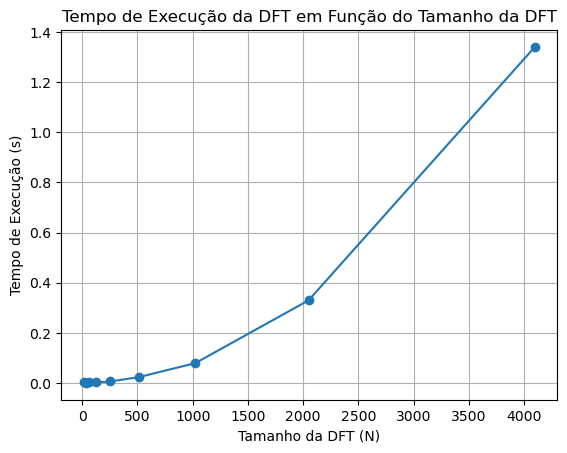

In [18]:
# Plotar o tempo de execução em função do tamanho da DFT (N)
plt.figure()
plt.plot(sizes, execution_times, marker='o')
plt.xlabel('Tamanho da DFT (N)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Tempo de Execução da DFT em Função do Tamanho da DFT')
plt.grid(True)
plt.show()